<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris

In [ ]:
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()

In [ ]:
df_iris = pd.DataFrame(data= np.c_[iris['data'],iris['target']],
                       columns=iris['feature_names']+['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
x=df_iris.iloc[:, :-1]
y=df_iris.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



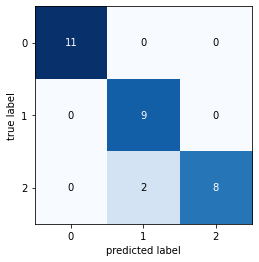

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()